### Part 1 - Cleaning Data

#### The data from 3 ranking systems needs to be cleaned and we need to standardize the names of Universities for all ranking systems based on which can merge data

In [1]:
#importing libraries
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import re
import math
from scipy import stats
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import matplotlib.patches as mpatches

# Setting options
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 5000)
pd.set_option('display.width', 5000)

# Loading data 
times_df = pd.read_csv('timesData.csv')
cwur_df = pd.read_csv('cwurData.csv')
shanghai_df = pd.read_csv('shanghaiData.csv')

In [2]:
# Cleaning data

times_df = times_df.replace("École Normale Supérieure", "Ecole Normale Superieure")
times_df = times_df.replace("École Polytechnique", "Ecole Polytechnique")
times_df = times_df.replace("École Polytechnique Fédérale de Lausanne","Ecole Polytechnique Federale de Lausanne")
times_df = times_df.replace("ETH Zurich – Swiss Federal Institute of Technology Zurich",
                            "Swiss Federal Institute of Technology Zurich")
times_df = times_df.replace("King’s College London", "King's College London")
times_df = times_df.replace("Rutgers, the State University of New Jersey", "Rutgers University, New Brunswick")
times_df = times_df.replace("The University of Queensland", "University of Queensland")
times_df = times_df.replace("University of Göttingen", "University of Gottingen")
times_df = times_df.replace("University of Michigan", "University of Michigan, Ann Arbor")
times_df = times_df.replace("University of Minnesota", "University of Minnesota, Twin Cities")
times_df = times_df.replace("Paris-Sud University", "University of Paris-Sud")
times_df = times_df.replace("Washington University in St Louis", "Washington University in St. Louis")
times_df = times_df.replace("University of Massachusetts", "University of Massachusetts Medical School")
times_df = times_df.replace("Wageningen University and Research Center", "Wageningen University and Research Centre")

cwur_df = cwur_df.replace("University of Göttingen", "University of Gottingen")
cwur_df = cwur_df.replace("École normale supérieure - Paris", "Ecole Normale Superieure")
cwur_df = cwur_df.replace("École Polytechnique", "Ecole Polytechnique")
cwur_df = cwur_df.replace("Swiss Federal Institute of Technology in Lausanne", "Ecole Polytechnique Federale de Lausanne")
cwur_df = cwur_df.replace("Indiana University - Bloomington", "Indiana University Bloomington")
cwur_df = cwur_df.replace("Ludwig Maximilian University of Munich", "LMU Munich")
cwur_df = cwur_df.replace("Ohio State University, Columbus", "Ohio State University")
cwur_df = cwur_df.replace("Paris Diderot University - Paris 7", "Paris Diderot University")
cwur_df = cwur_df.replace("Pennsylvania State University, University Park", "Pennsylvania State University")
cwur_df = cwur_df.replace("Pierre-and-Marie-Curie University", "Pierre and Marie Curie University")
cwur_df = cwur_df.replace("Purdue University, West Lafayette", "Purdue University")
cwur_df = cwur_df.replace("Rutgers University-New Brunswick", "Rutgers University, New Brunswick")
cwur_df = cwur_df.replace("Swiss Federal Institute of Technology in Zurich", "Swiss Federal Institute of Technology Zurich")
cwur_df = cwur_df.replace("Swiss Federal Institute of Technology in Lausanne","Swiss Federal Institute of Technology Lausanne")
cwur_df = cwur_df.replace("Technion \xe2\x80\x93 Israel Institute of Technology", "Technion-Israel Institute of Technology")
cwur_df = cwur_df.replace("Texas A&M University, College Station", "Texas A&M University")
cwur_df = cwur_df.replace("University of Illinois at Urbana–Champaign", "University of Illinois at Urbana-Champaign")
cwur_df = cwur_df.replace("University of Pittsburgh - Pittsburgh Campus", "University of Pittsburgh")
cwur_df = cwur_df.replace("University of Washington - Seattle", "University of Washington")
cwur_df = cwur_df.replace("University of Wisconsin–Madison", "University of Wisconsin-Madison")
cwur_df = cwur_df.replace("Katholieke Universiteit Leuven", "KU Leuven")
cwur_df = cwur_df.replace("Ruprecht Karl University of Heidelberg", "Heidelberg University")
cwur_df = cwur_df.replace("London School of Economics", "London School of Economics and Political Science")

shanghai_df = shanghai_df.replace("Arizona State University - Tempe", "Arizona State University")
shanghai_df = shanghai_df.replace("Ecole Normale Superieure - Paris", "Ecole Normale Superieure")
shanghai_df = shanghai_df.replace("Massachusetts Institute of Technology (MIT)", "Massachusetts Institute of Technology")
shanghai_df = shanghai_df.replace("Pennsylvania State University - University Park", "Pennsylvania State University")
shanghai_df = shanghai_df.replace("Pierre and Marie  Curie University - Paris 6", "Pierre and Marie Curie University")
shanghai_df = shanghai_df.replace("Purdue University - West Lafayette", "Purdue University")
shanghai_df = shanghai_df.replace("Rutgers, The State University of New Jersey - New Brunswick",
                                  "Rutgers University, New Brunswick")
shanghai_df = shanghai_df.replace("Technical University Munich", "Technical University of Munich")
shanghai_df = shanghai_df.replace("Texas A & M University", "Texas A&M University")
shanghai_df = shanghai_df.replace("Texas A&M University - College Station", "Texas A&M University")
shanghai_df = shanghai_df.replace("The Australian National University", "Australian National University")
shanghai_df = shanghai_df.replace("The Hebrew University of Jerusalem", "Hebrew University of Jerusalem")
shanghai_df = shanghai_df.replace("The Imperial College of Science, Technology and Medicine", "Imperial College London")
shanghai_df = shanghai_df.replace("The Johns Hopkins University", "Johns Hopkins University")                                
shanghai_df = shanghai_df.replace("The Ohio State University - Columbus","Ohio State University")
shanghai_df = shanghai_df.replace("The University of Edinburgh","University of Edinburgh")
shanghai_df = shanghai_df.replace("The University of Manchester", "University of Manchester")
shanghai_df = shanghai_df.replace("The University of Melbourne","University of Melbourne")
shanghai_df = shanghai_df.replace("The University of Queensland", "University of Queensland")
shanghai_df = shanghai_df.replace("The University of Texas at Austin", "University of Texas at Austin")
shanghai_df = shanghai_df.replace("The University of Texas Southwestern Medical Center at Dallas",
                                  "University of Texas Southwestern Medical Center")
shanghai_df = shanghai_df.replace("The University of Tokyo","University of Tokyo")
shanghai_df = shanghai_df.replace("The University of Western Australia", "University of Western Australia")
shanghai_df = shanghai_df.replace("University of California-Berkeley", "University of California, Berkeley")
shanghai_df = shanghai_df.replace("University of Colorado at Boulder", "University of Colorado Boulder")
shanghai_df = shanghai_df.replace("University of Michigan - Ann Arbor", "University of Michigan, Ann Arbor")
shanghai_df = shanghai_df.replace("University of Michigan-Ann Arbor", "University of Michigan, Ann Arbor")
shanghai_df = shanghai_df.replace("University of Paris Sud (Paris 11)", "University of Paris-Sud")
shanghai_df = shanghai_df.replace("University of Paris-Sud (Paris 11)", "University of Paris-Sud")
shanghai_df = shanghai_df.replace("University of Pittsburgh-Pittsburgh Campus", "University of Pittsburgh")
shanghai_df = shanghai_df.replace("University of Pittsburgh, Pittsburgh Campus", "University of Pittsburgh")
shanghai_df = shanghai_df.replace("University of Wisconsin - Madison", "University of Wisconsin-Madison")
shanghai_df = shanghai_df.replace("University of Munich","LMU Munich")
shanghai_df = shanghai_df.replace("Moscow State University", "Lomonosov Moscow State University")
shanghai_df = shanghai_df.replace("University of Massachusetts Medical School - Worcester",
                                  "University of Massachusetts Medical School")

# recast data type
times_df['international'] = times_df['international'].replace('-', np.nan)
times_df['international'] = times_df['international'].astype(float)
times_df['income'] = times_df['income'].replace('-', np.nan)
times_df['income'] = times_df['income'].astype(float)
times_df['total_score'] = times_df['total_score'].replace('-', np.nan)
times_df['total_score'] = times_df['total_score'].astype(float)


# fill in na values with mean in the year and impute total score for times data
for year in range(2011, 2017):
    inter_mean = times_df[times_df['year'] == year].international.mean()
    income_mean = times_df[times_df['year'] == year].income.mean()
    times_df.ix[(times_df.year == year) & (times_df.international.isnull()), 'international'] = inter_mean
    times_df.ix[(times_df.year == year) & (times_df.income.isnull()), 'income'] = income_mean
times_df.ix[times_df.total_score.isnull(), 'total_score'] = 0.3*times_df['teaching'] + 0.3*times_df['citations'
                        ] + 0.3*times_df['research'] + 0.075*times_df['international'] + 0.025*times_df['income']

In [3]:
# Modifying Data

# replace ranking range to midpoint
def mid_rank(rank_string):
    rank = re.sub('=', '', rank_string)
    rank = rank.split('-')
    s = 0
    for each in rank:
        each = float(each)
        s = s + each
    return s/len(rank)

# replace ranking range for shanghai and times data
times_df['world_rank_tidy'] = times_df['world_rank'].apply(mid_rank)
shanghai_df['world_rank_tidy'] = shanghai_df['world_rank'].apply(mid_rank)

# get unique school and country using the cwur data
school_country = cwur_df.drop_duplicates(['institution', 'country'])[['institution', 'country']]

# get ranking and score information by year
cwur_world_ranking = cwur_df[['institution', 'country', 'world_rank', 'year']]
cwur_world_ranking = cwur_world_ranking.pivot(index = 'institution', columns = 'year')['world_rank']
cwur_world_ranking.columns = ['cwur_2012_r', 'cwur_2013_r', 'cwur_2014_r', 'cwur_2015_r']
cwur_world_ranking = cwur_world_ranking.reset_index()

times_ranking = times_df[['university_name', 'country', 'world_rank_tidy', 'year']]
times_ranking = times_ranking.pivot(index = 'university_name', columns = 'year')['world_rank_tidy']
times_ranking.columns = ['times_2011_r', 'times_2012_r', 'times_2013_r', 'times_2014_r', 'times_2015_r', 'times_2016_r']
times_ranking = times_ranking.reset_index()

shanghai_ranking = shanghai_df[['university_name', 'world_rank_tidy', 'year']]
for y in range(2005, 2011):
    shanghai_ranking = shanghai_ranking[shanghai_ranking.year != y]
shanghai_ranking = shanghai_ranking.pivot(index = 'university_name', columns = 'year')['world_rank_tidy']
shanghai_ranking.columns = ['sh_2011_r', 'sh_2012_r', 'sh_2013_r', 'sh_2014_r', 'sh_2015_r']
shanghai_ranking = shanghai_ranking.reset_index()

# Rename columns
cwur_world_ranking.rename(columns={'institution': 'university_name'}, inplace=True)
school_country.rename(columns={'institution': 'university_name'}, inplace=True)

# join ranking and score for all 3
rank_all = pd.merge(cwur_world_ranking, times_ranking, on = 'university_name', how = 'outer')
rank_all = pd.merge(rank_all, shanghai_ranking, on = 'university_name', how = 'outer')
rank_all = pd.merge(rank_all, school_country, on = 'university_name', how = 'left')

### Part 2 - Preparing data for analysis

#### We shall consider the top 100 Universities for each ranking system for the year 2015 and then merge them together. We will also consider the corresponding ranks for 2014.

In [4]:
# Merging relevant data

# Taking top 100 colleges from 3 ranking systems for the year 2015
rank_analysis = rank_all[['university_name','country', 'times_2015_r', 'cwur_2015_r', 'sh_2015_r', 
                         'times_2014_r', 'cwur_2014_r', 'sh_2014_r']]
ra_t = rank_analysis.sort_values(by='times_2015_r').head(100)
ra_c = rank_analysis.sort_values(by='cwur_2015_r').head(100)
ra_s = rank_analysis.sort_values(by='sh_2015_r').head(100)

# Merging the data based on top 100 universities from each ranking
rank_analysis_sct = pd.merge(ra_t, 
                     pd.merge(ra_c, ra_s, on = 'university_name', how = 'outer'), on = 'university_name', how = 'outer')

# Ensuring country column is not blank for universities not present in all 3 rankings
for i in range(len(rank_analysis_sct)):
    if pd.isnull(rank_analysis_sct.loc[i, 'country']):
        rank_analysis_sct.loc[i, 'country'] = str(rank_analysis[rank_analysis['university_name'] ==
            rank_analysis_sct.loc[i, 'university_name']].iloc[0]['country'])
        
# Manually replacing countries which were not present in our pivot for countires - cwur
rank_analysis_sct['country'][rank_analysis_sct['university_name'] == 'Technion-Israel Institute of Technology'] = 'Israel'
rank_analysis_sct['country'][rank_analysis_sct['university_name']
                              == 'Swiss Federal Institute of Technology Lausanne'] = 'Switzerland'

# Ensuring rank column is not blank for universities not present in all 3 rankings
rank_analysis_sct['times_2015_r'] = rank_analysis_sct['times_2015_r'].replace(np.nan, rank_analysis_sct['times_2015_r_x'])
rank_analysis_sct['times_2015_r'] = rank_analysis_sct['times_2015_r'].replace(np.nan, rank_analysis_sct['times_2015_r_y'])
rank_analysis_sct['cwur_2015_r'] = rank_analysis_sct['cwur_2015_r'].replace(np.nan, rank_analysis_sct['cwur_2015_r_x'])
rank_analysis_sct['cwur_2015_r'] = rank_analysis_sct['cwur_2015_r'].replace(np.nan, rank_analysis_sct['cwur_2015_r_y'])
rank_analysis_sct['sh_2015_r'] = rank_analysis_sct['sh_2015_r'].replace(np.nan, rank_analysis_sct['sh_2015_r_x'])
rank_analysis_sct['sh_2015_r'] = rank_analysis_sct['sh_2015_r'].replace(np.nan, rank_analysis_sct['sh_2015_r_y'])
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, rank_analysis_sct['times_2014_r_x'])
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, rank_analysis_sct['times_2014_r_y'])
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, rank_analysis_sct['cwur_2014_r_x'])
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, rank_analysis_sct['cwur_2014_r_y'])
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, rank_analysis_sct['sh_2014_r_x'])
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, rank_analysis_sct['sh_2014_r_y'])

# Replacing nan items (universities which do not exist in ranking) with rank of 700 to ensure they are at farther distance
rank_analysis_sct['times_2015_r'] = rank_analysis_sct[['times_2015_r']].replace(np.nan, 700)
rank_analysis_sct['cwur_2015_r'] = rank_analysis_sct['cwur_2015_r'].replace(np.nan, 700)
rank_analysis_sct['sh_2015_r'] = rank_analysis_sct['sh_2015_r'].replace(np.nan, 700)
rank_analysis_sct['times_2015_r'] = rank_analysis_sct['times_2015_r'].astype(int)
rank_analysis_sct['cwur_2015_r'] = rank_analysis_sct['cwur_2015_r'].astype(int)
rank_analysis_sct['sh_2015_r'] = rank_analysis_sct['sh_2015_r'].astype(int)
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].replace(np.nan, 700)
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].replace(np.nan, 700)
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].replace(np.nan, 700)
rank_analysis_sct['times_2014_r'] = rank_analysis_sct['times_2014_r'].astype(int)
rank_analysis_sct['cwur_2014_r'] = rank_analysis_sct['cwur_2014_r'].astype(int)
rank_analysis_sct['sh_2014_r'] = rank_analysis_sct['sh_2014_r'].astype(int)

# Selecting only required columns
rank_analysis_sct = rank_analysis_sct[['university_name', 'country', 'times_2015_r', 'cwur_2015_r', 'sh_2015_r', 
                                        'times_2014_r', 'cwur_2014_r', 'sh_2014_r']]

# Creating columns for difference in ranking for each pair for the 2 years
rank_analysis_sct['t_c_15'] = rank_analysis_sct['times_2015_r'] - rank_analysis_sct['cwur_2015_r']
rank_analysis_sct['t_s_15'] = rank_analysis_sct['times_2015_r'] - rank_analysis_sct['sh_2015_r']
rank_analysis_sct['c_s_15'] = rank_analysis_sct['cwur_2015_r'] - rank_analysis_sct['sh_2015_r']
rank_analysis_sct['t_c_14'] = rank_analysis_sct['times_2014_r'] - rank_analysis_sct['cwur_2014_r']
rank_analysis_sct['t_s_14'] = rank_analysis_sct['times_2014_r'] - rank_analysis_sct['sh_2014_r']
rank_analysis_sct['c_s_14'] = rank_analysis_sct['cwur_2014_r'] - rank_analysis_sct['sh_2014_r']

C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Nelson\Anaconda3\lib\site-packages\ipykernel\__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### In addition to merging the data, we have created new columns which give the pair-wise difference in rankings for the 3 pair of Universities. We have not taken square of difference as we need the sign of the difference to understand which side the bias is coming from (Ranking system 1 or 2 in a pair)

#### For example, below we see the Universities for which the rating by Times was very high compared to rating by CWUR

In [5]:
rank_analysis_sct[rank_analysis_sct['t_c_15'] < -300][['university_name', 'country', 'times_2015_r', 'cwur_2015_r', 't_c_15']]

,university_name,country,times_2015_r,cwur_2015_r,t_c_15
62,Scuola Normale Superiore di Pisa,Italy,63,393,-330
84,Middle East Technical University,Turkey,85,470,-385


### Part 3 - Clustering universities into 'biased' and 'non biased' groups and calculating the magnitude of bias for each University based on all 3 ranking systems over 2014 and 2015.

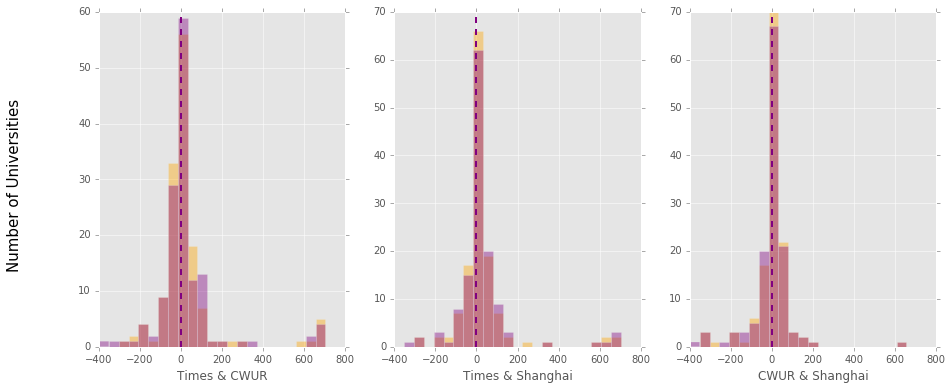

In [22]:
# Checking the distribution of pairwise rankings over 2 years to see if there is any significant change

fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(15, 6))
fig.text(0.04, 0.5, 'Number of Universities', va='center', rotation='vertical', fontsize =15)

plt.subplot(1,3,1)
plt.hist(rank_analysis_sct.t_c_14, color = 'orange', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'orange', linestyle = 'dashed', linewidth = 2)
plt.hist(rank_analysis_sct.t_c_15, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Times & CWUR')

plt.subplot(1,3,2)
plt.hist(rank_analysis_sct.t_s_14, color = 'orange', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'orange', linestyle = 'dashed', linewidth = 2)
plt.hist(rank_analysis_sct.t_s_15, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('Times & Shanghai')

plt.subplot(1,3,3)
plt.hist(rank_analysis_sct.c_s_14, color = 'orange', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'orange', linestyle = 'dashed', linewidth = 2)
plt.hist(rank_analysis_sct.c_s_15, color = 'purple', alpha = 0.4, range=[-400,800], bins=(25))
plt.axvline(0, color = 'purple', linestyle = 'dashed', linewidth = 2)
plt.xlabel('CWUR & Shanghai')

plt.suptitle("Distribution of pairwise ranking difference for 2014(Orange) and 2015 (Purple)", fontsize=20)

plt.savefig('RankDiffHist.jpg')
plt.show()

#### We observe that the pairwise difference in ranking for 2014 and 2015 are almost similarly distributed which suggests that each ranking system has remained stable over the 1 year period and so has the difference in ranks between each pairs.

#### Thus, we can can continue our analysis and determine clusters of Universities based on rank difference, considering both these years.

In [7]:
rank_analysis_sct['t_c_cluster_logical'] = 0
rank_analysis_sct['t_c_cluster'] = 0
rank_analysis_sct['t_s_cluster'] = 0
rank_analysis_sct['c_s_cluster'] = 0

# Creating logical clusters for Times vs CWUR based on intervals obtained after eyeballing the data
for i in range(len(rank_analysis_sct)):
    if rank_analysis_sct.loc[i,'t_c_15'] < -316: rank_analysis_sct.loc[i,'t_c_cluster_logical'] = 0
    elif rank_analysis_sct.loc[i,'t_c_15'] < -50 and rank_analysis_sct.loc[i,'t_c_15'] >= -316:
        rank_analysis_sct.loc[i,'t_c_cluster_logical'] = 1
    elif rank_analysis_sct.loc[i,'t_c_15'] > -50 and rank_analysis_sct.loc[i,'t_c_15'] < 50:
        rank_analysis_sct.loc[i,'t_c_cluster_logical'] = 2
    elif rank_analysis_sct.loc[i,'t_c_15'] > 50 and rank_analysis_sct.loc[i,'t_c_15'] <= 316:
        rank_analysis_sct.loc[i,'t_c_cluster_logical'] = 3
    elif rank_analysis_sct.loc[i,'t_c_15'] > 316: rank_analysis_sct.loc[i,'t_c_cluster_logical'] = 4
    

In [8]:
rank_analysis_sct.groupby('t_c_cluster_logical').count()

,university_name,country,times_2015_r,cwur_2015_r,sh_2015_r,times_2014_r,cwur_2014_r,sh_2014_r,t_c_15,t_s_15,c_s_15,t_c_14,t_s_14,c_s_14,t_c_cluster,t_s_cluster,c_s_cluster
t_c_cluster_logical,,,,,,,,,,,,,,,,,
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
3,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
4,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


#### Here we have created a logical cluster for the pair Times and CWUR after eyeballing our data. This will give us a good measure of testing our clustering algorithm.

#### Now let us cluster using K Mean algorithm

In [9]:
# Setting random seed so that classification labels do not change every time
np.random.seed(seed=1)

# Performing K Means Clustering for Times and CWUR
model = KMeans(n_clusters=5)
k_mean_t_c = rank_analysis_sct[['t_c_15', 't_c_14']]
model.fit(k_mean_t_c)

# Assigning correct labels
pred_t_c = np.choose(model.labels_, [3, 4, 1, 0, 2]).astype(np.int64)

# Adding column of cluster information to dataset
rank_analysis_sct['t_c_cluster'] = pred_t_c

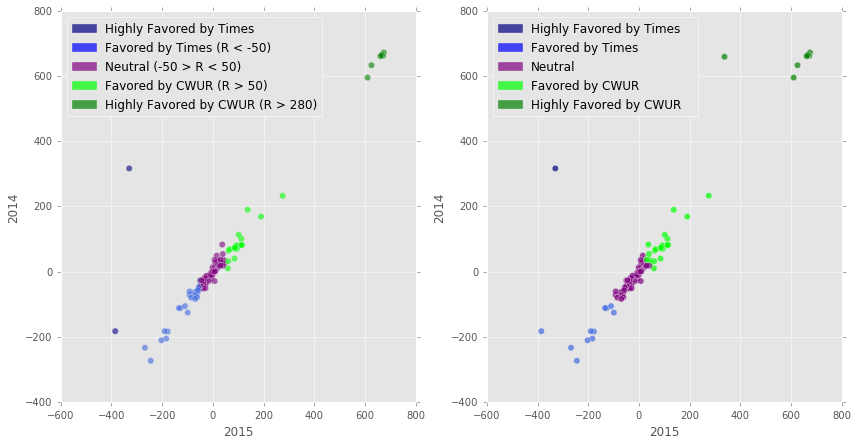

In [23]:
# Plotting figure
plt.figure(figsize=(14,7))
colormap_tc = np.array(['navy', 'royalblue', 'purple','lime', 'green'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(rank_analysis_sct.t_c_15, rank_analysis_sct.t_c_14, c=colormap_tc[rank_analysis_sct.t_c_cluster_logical], 
            s=40, alpha=0.6)
plt.title('University Bias - Times vs CWUR (Logical)', fontsize = 15)
plt.xlabel('2015')
plt.ylabel('2014')
navy = mpatches.Patch(color='navy', label='Highly Favored by Times', alpha = 0.7)
blue = mpatches.Patch(color='blue', label='Favored by Times (R < -50)', alpha = 0.7)
purple = mpatches.Patch(color='purple', label='Neutral (-50 > R < 50)', alpha = 0.7)
lime = mpatches.Patch(color='lime', label='Favored by CWUR (R > 50)', alpha = 0.7)
green = mpatches.Patch(color='green', label='Highly Favored by CWUR (R > 280)', alpha = 0.7)
plt.legend(handles=[navy, blue, purple, lime, green], loc = 2)

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(k_mean_t_c.t_c_15, k_mean_t_c.t_c_14, c=colormap_tc[pred_t_c], s=40, alpha = 0.7)
plt.title('University Bias - Times vs CWUR (K Mean)', fontsize = 15)
plt.xlabel('2015')
plt.ylabel('2014')
navy = mpatches.Patch(color='navy', label='Highly Favored by Times', alpha = 0.7)
blue = mpatches.Patch(color='blue', label='Favored by Times', alpha = 0.7)
purple = mpatches.Patch(color='purple', label='Neutral', alpha = 0.7)
lime = mpatches.Patch(color='lime', label='Favored by CWUR', alpha = 0.7)
green = mpatches.Patch(color='green', label='Highly Favored by CWUR   ', alpha = 0.7)
plt.legend(handles=[navy, blue, purple, lime, green], loc = 2)

plt.savefig('LogicalVsKMean.jpg')
plt.show()

In [11]:
# Comparing K-mean classification to logical classification
y = rank_analysis_sct.t_c_cluster_logical

# Performance Metrics
print('Accuracy',sm.accuracy_score(y, pred_t_c))

# Confusion Matrix
sm.confusion_matrix(y, pred_t_c)

Accuracy 0.823943661972


array([[ 1,  1,  1,  0,  0],
       [ 0, 10, 15,  0,  0],
       [ 0,  0, 79,  8,  0],
       [ 0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  7]])

#### 85% Accuracy rate is pretty good (especially considering we just eyeballed the data to determine initial clusters) so will use the K Mean model to cluster other 2 ranking systems as well.

In [12]:
# Setting random seed so that classification labels do not change every time
np.random.seed(seed=1)

# Performing K Means Clustering for Times and Shanghai
model = KMeans(n_clusters=6)
k_mean_t_s = rank_analysis_sct[['t_s_15', 't_s_14']]
model.fit(k_mean_t_s)
pred_t_s = np.choose(model.labels_, [2,0,4,1,3,5]).astype(np.int64) # Assigning correct labels for Times and Shanghai

# Performing K Means Clustering for CWUR and Shanghai
model = KMeans(n_clusters=5)
k_mean_c_s = rank_analysis_sct[['c_s_15', 'c_s_14']]
model.fit(k_mean_c_s)
pred_c_s = np.choose(model.labels_, [1,3,0,4,2]).astype(np.int64) # Assigning correct labels for CWUR and Shanghai

# Adding column of cluster information to dataset
rank_analysis_sct['t_s_cluster'] = pred_t_s
rank_analysis_sct['c_s_cluster'] = pred_c_s

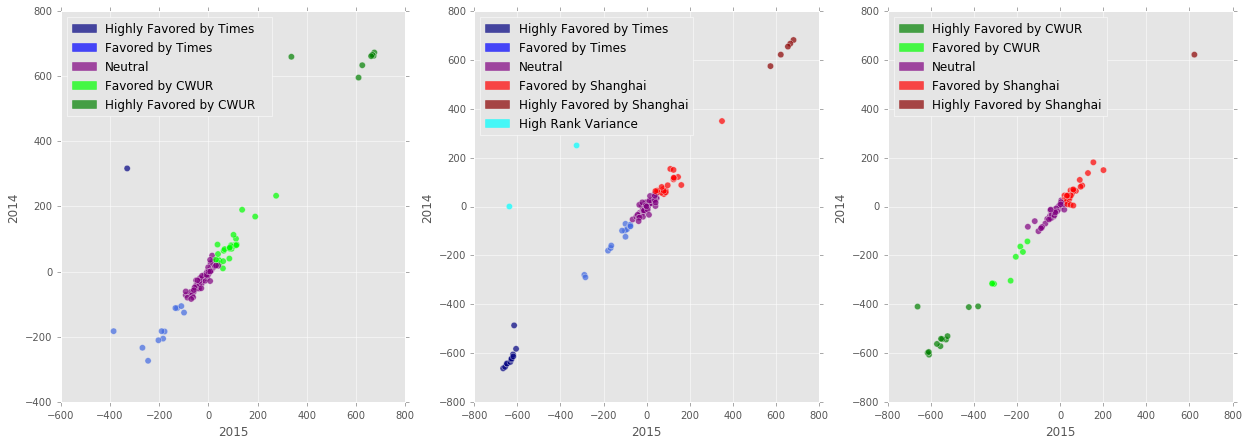

In [24]:
# Plotting figure
plt.figure(figsize=(21,7))
colormap_tc = np.array(['navy', 'royalblue', 'purple','lime', 'green'])
colormap_ts = np.array(['navy','royalblue', 'purple','red', 'darkred', 'aqua'])
colormap_cs = np.array(['green','lime', 'purple','red', 'darkred'])

# Plot the Models Classifications
plt.subplot(1, 3, 1)
plt.scatter(k_mean_t_c.t_c_15, k_mean_t_c.t_c_14, c=colormap_tc[pred_t_c], s=40, alpha = 0.7)
plt.title('University Bias - Times vs CWUR', fontsize = 15)
plt.xlabel('2015')
plt.ylabel('2014')
plt.legend(handles=[navy, blue, purple, lime, green], loc = 2)

plt.subplot(1, 3, 2)
plt.scatter(k_mean_t_s.t_s_15, k_mean_t_s.t_s_14, c=colormap_ts[pred_t_s], s=40, alpha = 0.7)
plt.title('University Bias - Times vs Shanghai', fontsize = 15)
plt.xlabel('2015')
plt.ylabel('2014')
red = mpatches.Patch(color='red', label='Favored by Shanghai', alpha = 0.7)
darkred = mpatches.Patch(color='darkred', label='Highly Favored by Shanghai', alpha = 0.7)
aqua = mpatches.Patch(color='aqua', label='High Rank Variance', alpha = 0.7)
plt.legend(handles=[navy, blue, purple, red, darkred, aqua], loc = 2)

plt.subplot(1, 3, 3)
plt.scatter(k_mean_c_s.c_s_15, k_mean_c_s.c_s_14, c=colormap_cs[pred_c_s], s=40, alpha = 0.7)
plt.title('University Bias - CWUR vs Shanghai', fontsize = 15)
plt.xlabel('2015')
plt.ylabel('2014')
plt.legend(handles=[green, lime, purple, red, darkred], loc = 2)

plt.savefig('UniversityBias.jpg')
plt.show()

#### These plots help us visualize the count of Universities for which there is underlying bias between any 2 ranking systems as well as understand in which form the bias exists.

#### Now let us aggregate the result for each University.

In [14]:
# Creating binary columns to determine if 2 systems agree on the ranking of University (based on cluster)

for i in range(len(rank_analysis_sct)):
    if rank_analysis_sct.loc[i,'t_c_cluster'] == 2: rank_analysis_sct.loc[i,'t_c_proximity'] = 1
    else: rank_analysis_sct.loc[i,'t_c_proximity'] = 0
    if rank_analysis_sct.loc[i,'t_s_cluster'] == 2: rank_analysis_sct.loc[i,'t_s_proximity'] = 1
    else: rank_analysis_sct.loc[i,'t_s_proximity'] = 0
    if rank_analysis_sct.loc[i,'c_s_cluster'] == 2: rank_analysis_sct.loc[i,'c_s_proximity'] = 1
    else: rank_analysis_sct.loc[i,'c_s_proximity'] = 0

# Creating column for aggregate trustworthiness of all 3 ranking systems for each University
# Score of 3 means all 3 ranking sytem pairs agree on ranking of a University and
# Score of 0 means that no pair of ranking system agrees on ranking of a University
rank_analysis_sct['impartiality_score'] = rank_analysis_sct['t_c_proximity'] + rank_analysis_sct['t_s_proximity'
                                                        ] + rank_analysis_sct['c_s_proximity']

rank_analysis_sct.to_csv('rank_analysis_sct.csv')

# Summarizing results
assurance_summary = rank_analysis_sct[['university_name', 'impartiality_score']].groupby('impartiality_score').count()
assurance_summary.rename(columns={'university_name': 'Total Universities'}, inplace=True)
assurance_summary.sort_index(ascending = False)

,Total Universities
impartiality_score,
3,46
2,45
1,31
0,20


#### We can interpret the above results as:
#### 50 Universities have similar rankings across all ranking systems which means that all ranking systems are impartial towards them whereas 16 Universities have very different rankings across all ranking systems which means one of the the ranking systems is heavily biased towards them.

### Part 4 - Checking for bias in ranking system owing to countries

#### First let us see how the distribution of countries in the ranking systems looks like

In [15]:
country_bias = pd.DataFrame(rank_analysis_sct.groupby('country').count().sort_values(by='university_name',
                                                                      ascending = False)['university_name'])

country_bias = pd.DataFrame(list(country_bias['university_name'].values), list(country_bias['university_name'].index))
country_bias.rename(columns={0: 'Total Universities'}, inplace=True)
country_bias.head(3)

,Total Universities
USA,60
United Kingdom,12
Netherlands,8


#### Here we see the distribution of countries harboring top 100 universities in each ranking system.

#### Now let us check if any ranking system exhibits bias based on country. For the purpose of this analysis, we will assume there is a bias if the difference in ranking is greater than 50 (this is a charitable range given that we are considering the top 100 Universities). Also, we will be considering all countries in this analysis, but the countries which have less than 2 universities in the ranking won't be very significant (and hence won't be displayed) in the final analysis just on account of small sample size.

#### We will be considering both - the bias against Universities from a country as well as the bias towards the universities from a country.

In [36]:
bias_times_f = pd.DataFrame(rank_analysis_sct[(rank_analysis_sct.t_c_15  < -50) & (rank_analysis_sct.t_s_15  < -50)
                                             ].groupby('country').count()['university_name'])
bias_times_f = pd.DataFrame(list(bias_times_f['university_name'].values), list(bias_times_f['university_name'].index))
bias_times_f.rename(columns={0: 'Times Bias'}, inplace=True)

bias_cwur_f = pd.DataFrame(rank_analysis_sct[(rank_analysis_sct.t_c_15  > 50) & (rank_analysis_sct.c_s_15  < -50)
                                             ].groupby('country').count()['university_name'])
bias_cwur_f = pd.DataFrame(list(bias_cwur_f['university_name'].values), list(bias_cwur_f['university_name'].index))
bias_cwur_f.rename(columns={0: 'CWUR Bias'}, inplace=True)

bias_shanghai_f = pd.DataFrame(rank_analysis_sct[(rank_analysis_sct.t_s_15  > 50) & (rank_analysis_sct.c_s_15  > 50)
                                             ].groupby('country').count()['university_name'])
bias_shanghai_f = pd.DataFrame(list(bias_shanghai_f['university_name'].values), list(bias_shanghai_f['university_name'].index))
bias_shanghai_f.rename(columns={0: 'Shanghai Bias'}, inplace=True)

country_bias_f = pd.merge(country_bias, bias_times_f, on=None,left_index=True, right_index=True, how = 'left')
country_bias_f['Times Bias'] = country_bias_f['Times Bias'].replace(np.nan, 0)
country_bias_f['Times Bias %'] = country_bias_f['Times Bias'] / country_bias_f['Total Universities'] * 100

country_bias_f = pd.merge(country_bias_f, bias_cwur_f, on=None,left_index=True, right_index=True, how = 'left')
country_bias_f['CWUR Bias'] = country_bias_f['CWUR Bias'].replace(np.nan, 0)
country_bias_f['CWUR Bias %'] = country_bias_f['CWUR Bias'] / country_bias_f['Total Universities'] * 100

country_bias_f = pd.merge(country_bias_f, bias_shanghai_f, on=None,left_index=True, right_index=True, how = 'left')
country_bias_f['Shanghai Bias'] = country_bias_f['Shanghai Bias'].replace(np.nan, 0)
country_bias_f['Shanghai Bias %'] = country_bias_f['Shanghai Bias'] / country_bias_f['Total Universities'] * 100


bias_times_a = pd.DataFrame(rank_analysis_sct[(rank_analysis_sct.t_c_15  > 50) & (rank_analysis_sct.t_s_15  > 50)
                                             ].groupby('country').count()['university_name'])
bias_times_a = pd.DataFrame(list(bias_times_a['university_name'].values), list(bias_times_a['university_name'].index))
bias_times_a.rename(columns={0: 'Times Bias'}, inplace=True)

bias_cwur_a = pd.DataFrame(rank_analysis_sct[(rank_analysis_sct.t_c_15  < -50) & (rank_analysis_sct.c_s_15  > 50)
                                             ].groupby('country').count()['university_name'])
bias_cwur_a = pd.DataFrame(list(bias_cwur_a['university_name'].values), list(bias_cwur_a['university_name'].index))
bias_cwur_a.rename(columns={0: 'CWUR Bias'}, inplace=True)

bias_shanghai_a = pd.DataFrame(rank_analysis_sct[(rank_analysis_sct.t_s_15  < -50) & (rank_analysis_sct.c_s_15  < -50)
                                             ].groupby('country').count()['university_name'])
bias_shanghai_a = pd.DataFrame(list(bias_shanghai_a['university_name'].values), list(bias_shanghai_a['university_name'].index))
bias_shanghai_a.rename(columns={0: 'Shanghai Bias'}, inplace=True)

country_bias_a = pd.merge(country_bias, bias_times_a, on=None,left_index=True, right_index=True, how = 'left')
country_bias_a['Times Bias'] = country_bias_a['Times Bias'].replace(np.nan, 0)
country_bias_a['Times Bias %'] = country_bias_a['Times Bias'] / country_bias_a['Total Universities'] * 100

country_bias_a = pd.merge(country_bias_a, bias_cwur_a, on=None,left_index=True, right_index=True, how = 'left')
country_bias_a['CWUR Bias'] = country_bias_a['CWUR Bias'].replace(np.nan, 0)
country_bias_a['CWUR Bias %'] = country_bias_a['CWUR Bias'] / country_bias_a['Total Universities'] * 100

country_bias_a = pd.merge(country_bias_a, bias_shanghai_a, on=None,left_index=True, right_index=True, how = 'left')
country_bias_a['Shanghai Bias'] = country_bias_a['Shanghai Bias'].replace(np.nan, 0)
country_bias_a['Shanghai Bias %'] = country_bias_a['Shanghai Bias'] / country_bias_a['Total Universities'] * 100

country_bias_f.to_csv('country_bias_f.csv')
country_bias_a.to_csv('country_bias_a.csv')

In [37]:
country_bias_f

,Total Universities,Times Bias,Times Bias %,CWUR Bias,CWUR Bias %,Shanghai Bias,Shanghai Bias %
USA,60,1,1.666667,3,5,0,0.000000
United Kingdom,12,2,16.666667,0,0,0,0.000000
Netherlands,8,2,25.000000,0,0,0,0.000000
Japan,8,0,0.000000,4,50,0,0.000000
Germany,7,3,42.857143,0,0,1,14.285714
Australia,6,0,0.000000,0,0,1,16.666667
France,5,0,0.000000,0,0,1,20.000000
Switzerland,5,1,20.000000,0,0,0,0.000000
Canada,4,0,0.000000,0,0,0,0.000000
Israel,4,0,0.000000,2,50,1,25.000000


In [73]:
bias_for_times = country_bias_f[(country_bias_f['Times Bias %'] >= 15) & (country_bias_f['Total Universities'] > 1)
        ].sort_values(by='Total Universities', ascending = False)[['Total Universities', 'Times Bias', 'Times Bias %']]

bias_against_times = country_bias_a[(country_bias_a['Times Bias %'] >= 15) & (country_bias_a['Total Universities'] > 1)
        ].sort_values(by='Total Universities', ascending = False)[['Total Universities', 'Times Bias', 'Times Bias %']]

bias_for_cwur = country_bias_f[(country_bias_f['CWUR Bias %'] >= 15) & (country_bias_f['Total Universities'] > 1)
        ].sort_values(by='Total Universities', ascending = False)[['Total Universities', 'CWUR Bias', 'CWUR Bias %']]

bias_against_cwur = country_bias_a[(country_bias_a['CWUR Bias %'] >= 15) & (country_bias_a['Total Universities'] > 1)
        ].sort_values(by='Total Universities', ascending = False)[['Total Universities', 'CWUR Bias', 'CWUR Bias %']]

bias_for_shanghai = country_bias_f[(country_bias_f['Shanghai Bias %'] >= 15) & (country_bias_f['Total Universities'] > 1)
        ].sort_values(by='Total Universities', ascending = False)[['Total Universities', 'Shanghai Bias', 'Shanghai Bias %']]

bias_against_shanghai = country_bias_a[(country_bias_a['Shanghai Bias %'] >= 15) & (country_bias_a['Total Universities'] > 1)
        ].sort_values(by='Total Universities', ascending = False)[['Total Universities', 'Shanghai Bias', 'Shanghai Bias %']]

#### Creating a generic function to plot graphs which represent bias for and bias against universities from certain countries...

In [74]:
def bias_plot(b_for, b_against, b_name):
    
    def autolabel(rects, ht, m):
        cnt = 0
        for rect in rects:
            height = rect.get_height()
            if cnt < len(rects) and rect == rects1[cnt]:
                ht.append(height)
                cnt+=1
                m.text(rect.get_x() + rect.get_width()/2., 
                         height/2-0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12)
            else:
                m.text(rect.get_x() + rect.get_width()/2., 
                         height/2-0.5, '%d' % int(height), ha='center', va='bottom', fontsize=12)
                
                if m==ax2 and cnt==0 and height/ht[cnt] > 0.85:
                    m.text(rect.get_x() + rect.get_width()/2., 
                        height-2, '%d' % (height/ht[cnt]*100)+'%', ha='center', va='bottom', fontsize=18)
                else:
                    m.text(rect.get_x() + rect.get_width()/2., 
                        height, '%d' % (height/ht[cnt]*100)+'%', ha='center', va='bottom', fontsize=18)
                cnt+=1
        return ht
    
    N = len(b_for)
    univ_total = np.array(b_for['Total Universities'])
    univ_bias_for = np.array(b_for[b_name + ' Bias'])
    ind = np.arange(N)
    width = 0.35
    
    fig, (ax1, ax2) = plt.subplots(2, figsize = (15,6))
    rects1 = ax1.bar(ind, univ_total, width, color='royalblue')
    rects2 = ax1.bar(ind + width, univ_bias_for, width, color='lightsteelblue')
    ax1.set_ylabel('Count', fontsize=14)
    ax1.set_xticks(ind + width)
    ax1.set_xticklabels(b_for.index, fontsize=14)
    ax1.legend((rects1[0], rects2[0]), ('Total Universities for Country (Present across all rankings)', 
                                       'Total Universities with ranking difference > 50 for ' + b_name))
    ht = []
    ht = autolabel(rects1, ht, ax1)
    autolabel(rects2, ht, ax1)
    
    N = len(b_against)
    univ_total = np.array(b_against['Total Universities'])
    univ_bias_against = np.array(b_against[b_name + ' Bias'])
    ind = np.arange(N)
    
    rects1 = ax2.bar(ind, univ_total, width, color='red')
    rects2 = ax2.bar(ind + width, univ_bias_against, width, color='salmon')
    ax2.set_ylabel('Count', fontsize=14)
    ax2.set_xticks(ind + width)
    ax2.set_xticklabels(b_against.index, fontsize=14)
    ax2.legend((rects1[0], rects2[0]), ('Total Universities for Country (All rankings)',
                                       'Total Universities NOT present in Rankings for ' + b_name))
    ht = []
    ht = autolabel(rects1, ht, ax2)
    autolabel(rects2, ht, ax2)
    
    plt.suptitle('Bias For(Blue) and Bias Against(Red) Universities from certain countries - ' + b_name, fontsize=20)
    plt.savefig(b_name+'_bias.jpg')
    plt.show()

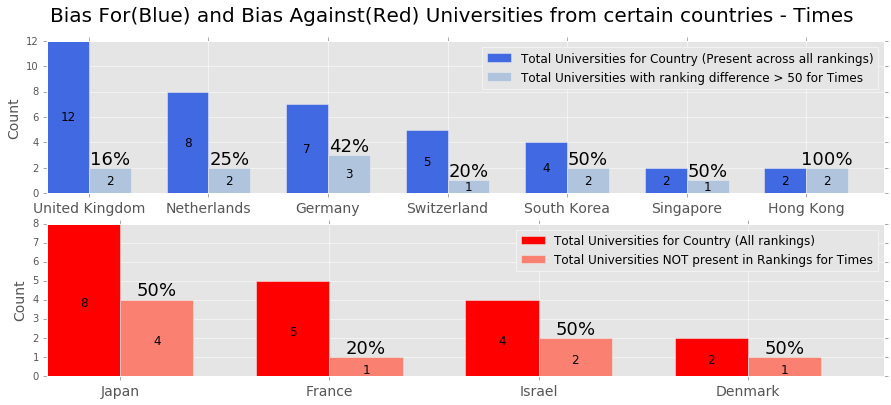

In [75]:
b_for = bias_for_times
b_against = bias_against_times
b_name = 'Times'

bias_for_times.to_csv('bias_for_times.csv')
bias_against_times.to_csv('bias_against_times.csv')

bias_plot(b_for, b_against, b_name)

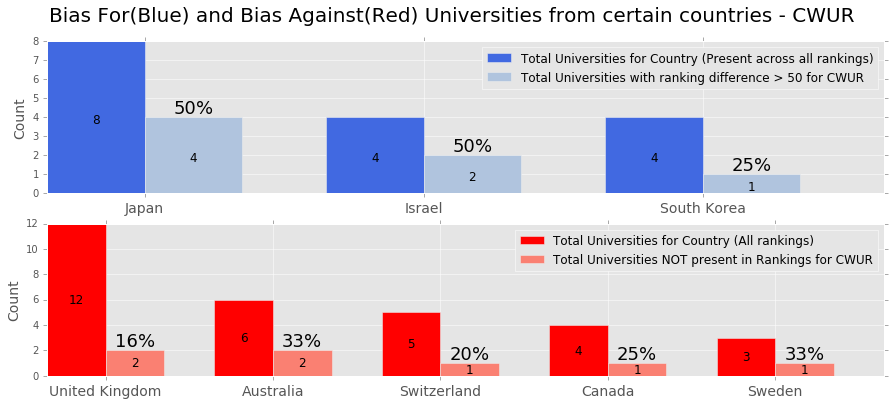

In [76]:
b_for = bias_for_cwur
b_against = bias_against_cwur
b_name = 'CWUR'

bias_plot(b_for, b_against, b_name)

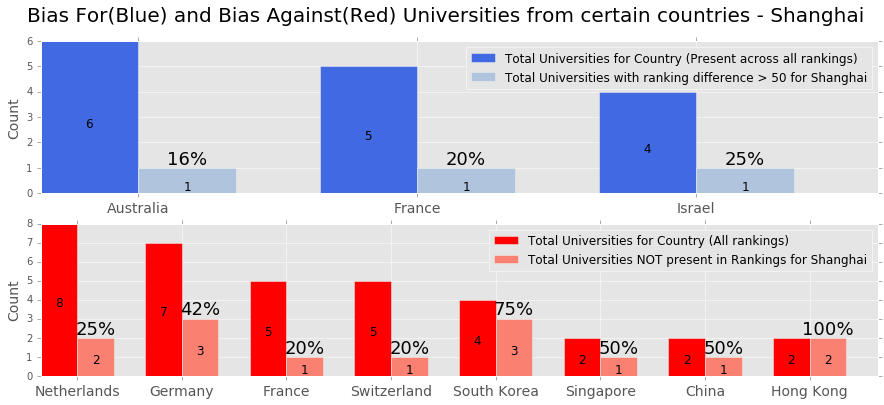

In [77]:
b_for = bias_for_shanghai
b_against = bias_against_shanghai
b_name = 'Shanghai'

bias_plot(b_for, b_against, b_name)

#### In conclusion, we can say that 
#### Times (a ranking system from the UK) exhibits a very very high bias for Universities from the Australia and South Korea, CWUR (a ranking system from Saudi Arabia) exhibits a very very high bias for Universities from Japan, Israel and South Korea whereas Shanghai (a ranking system from China) exhibits a very very high bias for Universities from France, Israel and Sweden.
#### Additionally
#### Times (A ranking system from the UK) exhibits a very very high bias against Universities from Japan, France and Israel, CWUR (a ranking system from Saudi Arabia)  exhibits a very very high bias against Universities from Germany, Australia and Sweden whereas Shanghai (a ranking system from China) exhibits a very very high bias against Universities from South Korea.